In [1]:
# 数据预处理：
# 1.读取图像文件
# 2.将jpg文件解码为RGB的像素网格
# 3.将这些像素网格转换为浮点张量
# 4.将像素值0-255 缩放到0-1

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models

Using TensorFlow backend.


In [3]:
# 将所有的图片缩放到 0-1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = "./data/dogs-vs-cats/cats_and_dogs_small/train/"
validation_dir = "./data/dogs-vs-cats/cats_and_dogs_small/validation/"
test_dir = "./data/dogs-vs-cats/cats_and_dogs_small/test/"

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 构建NN模型

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (2, 2), input_shape=(150, 150, 3), activation='relu'))

In [9]:
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [11]:
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

In [13]:
model.add(layers.MaxPooling2D(2, 2))

In [14]:
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

In [15]:
model.add(layers.MaxPooling2D(2, 2))

In [16]:
model.add(layers.Flatten())

In [17]:
model.add(layers.Dense(512, activation='relu'))

In [18]:
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       65664     
__________

In [20]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [21]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=5, validation_data=validation_generator, validation_steps=1)

Epoch 1/5
100/100 [==============================] - 16s 163ms/step - loss: 0.7320 - acc: 0.5120 - val_loss: 1.1335 - val_acc: 0.3500
Epoch 2/5
100/100 [==============================] - 7s 73ms/step - loss: 0.6491 - acc: 0.6185 - val_loss: 0.5753 - val_acc: 0.7000
Epoch 3/5
100/100 [==============================] - 8s 76ms/step - loss: 0.5779 - acc: 0.6990 - val_loss: 0.6107 - val_acc: 0.7500
Epoch 4/5
100/100 [==============================] - 7s 75ms/step - loss: 0.5282 - acc: 0.7385 - val_loss: 0.7203 - val_acc: 0.6000
Epoch 5/5
100/100 [==============================] - 7s 75ms/step - loss: 0.4777 - acc: 0.7690 - val_loss: 0.6546 - val_acc: 0.7000


In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [27]:
# 利用fit_generator对数据进行训练
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1970 - acc: 0.9195 - val_loss: 0.9473 - val_acc: 0.7330
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.1594 - acc: 0.9375 - val_loss: 0.7721 - val_acc: 0.7400
Epoch 3/30
100/100 [==============================] - 10s 103ms/step - loss: 0.1069 - acc: 0.9590 - val_loss: 1.0667 - val_acc: 0.7150
Epoch 4/30
100/100 [==============================] - 10s 103ms/step - loss: 0.1093 - acc: 0.9645 - val_loss: 1.4211 - val_acc: 0.7230
Epoch 5/30
100/100 [==============================] - 10s 103ms/step - loss: 0.0766 - acc: 0.9755 - val_loss: 1.4119 - val_acc: 0.7130
Epoch 6/30
100/100 [==============================] - 10s 103ms/step - loss: 0.0706 - acc: 0.9810 - val_loss: 1.3164 - val_acc: 0.7490
Epoch 7/30
100/100 [==============================] - 10s 102ms/step - loss: 0.0495 - acc: 0.9810 - val_loss: 1.9486 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 1

No handles with labels found to put in legend.
No handles with labels found to put in legend.


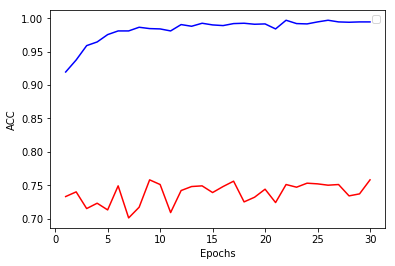

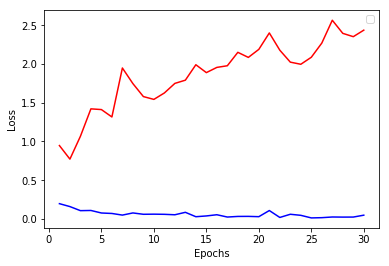

In [28]:
# 尚未使用数据增强的训练结果
epochs = [i+1 for i in range(30)]
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, acc, color='b')
plt.plot(epochs, val_acc, color='r')
plt.xlabel("Epochs")
plt.ylabel("ACC")
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b')
plt.plot(epochs, val_loss, color='r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [33]:
# 使用数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# rotation_range 随机旋转角度
# width_shift_range 随机水平偏移幅度
# height_shift_range 随机竖直偏移的幅度
# shear_range 剪切变换程度
# horizontal_flip是否进行水平翻转
# fill_mode 超出边界的点将根据本参数给定的方法进行处理

In [34]:
# 不能对测试数据进行增强
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# 对训练集 进行数据增强；对验证集和测试集进行值域缩放
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(150, 150), class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(150, 150), class_mode='binary')
validation_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(150, 150), class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
# 对数据增强后的数据重新建模训练：相比之前需要增加Dropout层来进行正则化处理
model = models.Sequential()

In [37]:
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(150, 150, 3)))

In [38]:
model.add(layers.MaxPooling2D((2, 2)))

In [39]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [40]:
model.add(layers.MaxPooling2D((2, 2)))

In [42]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [43]:
model.add(layers.MaxPooling2D((2, 2)))

In [44]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [45]:
model.add(layers.MaxPooling2D((2, 2)))

In [46]:
model.add(layers.Flatten())

In [47]:
model.add(layers.Dropout(0.5))

In [48]:
model.add(layers.Dense(512, activation='relu'))

In [49]:
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [51]:
model.compile(metrics=['acc'], optimizer='rmsprop', loss='binary_crossentropy')

In [53]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 29s 286ms/step - loss: 0.7261 - acc: 0.5031 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6953 - acc: 0.5600 - val_loss: 0.6732 - val_acc: 0.5495
Epoch 3/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6848 - acc: 0.5603 - val_loss: 0.6376 - val_acc: 0.6390
Epoch 4/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6548 - acc: 0.6353 - val_loss: 0.6186 - val_acc: 0.6707
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6257 - acc: 0.6413 - val_loss: 0.6058 - val_acc: 0.6472
Epoch 6/100
100/100 [==============================] - 27s 269ms/step - loss: 0.6096 - acc: 0.6775 - val_loss: 0.6634 - val_acc: 0.6440
Epoch 7/100
100/100 [==============================] - 26s 255ms/step - loss: 0.6026 - acc: 0.6716 - val_loss: 0.5857 - val_acc: 0.7069
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3441 - acc: 0.8562 - val_loss: 0.5801 - val_acc: 0.8230
Epoch 62/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3571 - acc: 0.8497 - val_loss: 0.4845 - val_acc: 0.8090
Epoch 63/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3581 - acc: 0.8434 - val_loss: 0.6110 - val_acc: 0.8096
Epoch 64/100
100/100 [==============================] - 25s 252ms/step - loss: 0.3282 - acc: 0.8637 - val_loss: 1.2587 - val_acc: 0.7728
Epoch 65/100
100/100 [==============================] - 25s 254ms/step - loss: 0.3594 - acc: 0.8516 - val_loss: 0.5051 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3499 - acc: 0.8513 - val_loss: 0.7210 - val_acc: 0.8154
Epoch 67/100
100/100 [==============================] - 26s 255ms/step - loss: 0.3513 - acc: 0.8535 - val_loss: 0.4938 - val_acc: 0.8179
Epoch 68/100
100/100 [===================